<center> # Naiwny klasyfikator bayesowski</center>

Celem ćwiczenia jest zapoznanie się z technikami konstrukcji naiwnego klasywikatora bayesowskiego. 

Ćwiczenie oparte jest o artykuł z [linku](https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python/notebook)

In [68]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split

Na początku proszę wczytać plik __data.csv__ używając jako separatora ',':

In [69]:
df =pd.read_csv("data.csv", sep = ",", decimal = ",")
df.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


W następnie sprawdź które z kolumn zawierają dane tekstowe lub liczbowe. W tym celu sprawdź wartość  argumentu *dtype* z odpowiednim warunkiem:

In [70]:
categorical=[]
non_categorical=[]
for column_name in df.columns:
    if df[column_name].dtype == 'int64':
        non_categorical.append(column_name)
    elif df[column_name].dtype == 'object':
        categorical.append(column_name)
print('Dane liczbowe zawierają kolumny :\n\n',non_categorical,'\n')
print('Dane tekstowe zawierają kolumny :\n\n',[i for i in categorical])

Dane liczbowe zawierają kolumny :

 ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week'] 

Dane tekstowe zawierają kolumny :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


Sprawdź czy dane w kolumnach nie zawierają braków a jeżeli tak uzupełnij je według znanych Ci metod:

In [71]:
#Sprawdzam puste wiersze we wszystkich kolumnach
df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [72]:
#Sprawdzam wiersze we wszystkich kolumnach czy zawieraja "?", jezeli tak zastepuje je "NaN"
for column in df.columns:
    df.loc[df[column]=='?',column] = 'NaN'

In [73]:
#Usuwam wiersze z brakującymi danymi
for column in df.columns:
     df.drop(df[df[column]=='NaN'].index, inplace=True) 

Na przygotowanych danych przeprowadź proces tworzenia zbiorów uczących i testowych, tak by klasyfikator rozpoznawał do której z grup w kolumnie 'income' należy opisywana osoba


In [74]:
X = df.drop(['income'],axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


Przy pomocy biblioteki [category_encoders](https://contrib.scikit-learn.org/category_encoders/) przeprowadź proces kodowania zmiennych tektowych z pozostałych kategorii na wartości liczbowe:

In [75]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)


Używając [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) przeprowadź klasyfikację daych ze zbiorów testowych i treningowych. Podaj dokładnosć modelu i macierz błędu wraz z jej wykresem i interpretacją.

Model accuracy score: 0.797420

Confusion matrix
 [[7041  366]
 [1613  749]]


Text(0.5, 1.0, 'Model score: 0.7974204115057836')

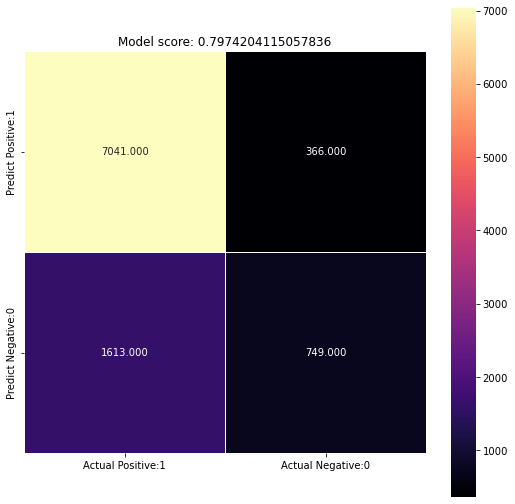

In [76]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print('Model accuracy score: {0:0.6f}\n'. format(accuracy_score(y_test, y_pred)))

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', cm)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
#wyznaczenie  i wizualizacja macierzy konfuzji do oceny dokładności
plt.figure(figsize=(9,9))
sns.heatmap(cm_matrix,annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'magma')
plt.title( 'Model score: {0}'.format(accuracy_score(y_test, y_pred)))


Przprowadź uczenie klasyfikatora dla kolumn *race* i *native_country*. Podaj dokładnosć modeli i macierze błędu wraz z ich wykresami i interpretacją. Przedstaw wnioski od czego zależą otrzymane wyniki

Model accuracy score: 0.797523
Confusion matrix
 [[7041  366]
 [1612  750]]


Text(0.5, 1.0, 'Model score: 0.7975227761285699')

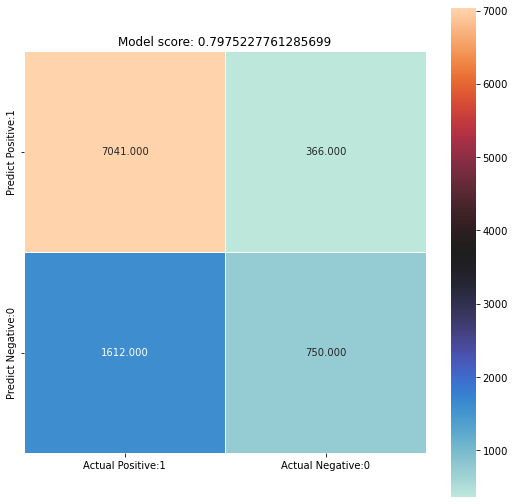

In [89]:
#wybieram zbior testowy i treningowy jako kolumny 'race' i 'native_country'
X = df.drop(columns=['race','native_country'])
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'income', 'sex'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print('Model accuracy score: {0:0.6f}'. format(accuracy_score(y_test, y_pred)))

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', cm)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
#wyznaczenie  i wizualizacja macierzy konfuzji do oceny dokładności
plt.figure(figsize=(9,9))
sns.heatmap(cm_matrix,annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'icefire')
plt.title( 'Model score: {0}'.format(accuracy_score(y_test, y_pred)))


**Wnioski**

*Na tych zajęciach zapoznałem się z naiwnym klasyfikatorem bayesowskim:

Klasyfikator bayesowski to algorytm używany do klasyfikowania danych. Jest to jeden z najstarszych i najbardziej podstawowych algorytmów uczenia maszynowego, który jest stosowany do rozwiązywania problemów klasyfikacji. Klasyfikator bayesowski wykorzystuje reguły probabilistyczne do określenia prawdopodobieństwa, że dane zostaną zaklasyfikowane do określonej kategorii.

Klasyfikator bayesowski ma wiele zalet, w tym: wysoce wydajny, możliwość uczenia się z małych zestawów danych, prosty w implementacji i małe wymagania w zakresie zasobów.

Klasyfikator bayesowski jest szczególnie przydatny do problemów klasyfikacji tekstu, takich jak rozpoznawanie języka, klasyfikacja treści i filtrowanie spamu. Jest to również często stosowany w wielu dziedzinach, w tym w marketingu, finansach, medycynie i bezpieczeństwie.

Pomimo swoich zalet, klasyfikator bayesowski ma kilka wad. Na przykład wymaga wystarczającej liczby danych do poprawnego działania, może być wrażliwy na niezbalansowane dane wejściowe i nie radzi sobie z dużymi zestawami danych.

*W moim przypadku użyłem go do przewidywania zarobków danej osoby(kolumna income),

*W obu przypadkach uzyskane modele dają zbliżone wyniki, a mianowicie wartość score dla obu modeli wynosi około 80%, taka warto pozwala nam stwierdzić, że model daje bardzo zadowalające wyniki. 